In [1]:
import os
from pathlib import Path

from es_sfgtools.processing.pipeline.data_handler import DataHandler
from es_sfgtools.processing.assets.siteconfig import SiteConfig, Site
from es_sfgtools.processing.operations.site_ops import (
    CTDfile_to_svp,
    masterfile_to_siteconfig,
    leverarmfile_to_atdoffset,
)
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [32,18]
from es_sfgtools.utils.loggers import BaseLogger
pride_path = Path.home() / ".PRIDE_PPPAR_BIN"
os.environ["PATH"] += os.pathsep + str(pride_path)

In [2]:
main_dir = Path("/Users/franklyndunbar/Project/SeaFloorGeodesy/Data/SFGMain")
dh = DataHandler(main_dir)
OVERRIDE=False
network = "cascadia-gorda"
station = "NCC1"
survey = "2024_A_1126"

dh.change_working_station(network=network, station=station, survey=survey)
ncc1_2024_config = dh.station_dir / "NCC1_2024_config.yaml"
svp_path = dh.station_dir / "NCC1_CTD_2021_fit"
svp_path_processed = dh.station_dir / "svp.csv"
if not svp_path_processed.exists():
    svp_df = CTDfile_to_svp(svp_path)
    svp_df.to_csv(svp_path_processed)

config = SiteConfig.from_config(ncc1_2024_config)
config.sound_speed_data = svp_path_processed
gp_handler_ncc1= dh.get_garpos_handler(site_config=config)


In [3]:
site_path = Path(
    "/Users/franklyndunbar/Project/SeaFloorGeodesy/es_sfgtools/dev/NCC1_Dec3_move_around.json"
)

gp_handler_ncc1.load_campaign_data(site_path)
gp_handler_ncc1.set_campaign("2024_A_1126")

for survey in list(gp_handler_ncc1.campaign.surveys.values()):
    print(survey)

id='2024_A_1126_1' type='circle drive' vesselName='1126' benchmarkIDs=['NCC1-1', 'NCC1-2', 'NCC1-3'] start=datetime.datetime(2024, 9, 22, 17, 30) end=datetime.datetime(2024, 9, 23, 0, 35) shot_data_path=None
id='2024_A_1126_2' type='center' vesselName='1126' benchmarkIDs=['NCC1-1', 'NCC1-2', 'NCC1-3-2'] start=datetime.datetime(2024, 9, 26, 15, 30) end=datetime.datetime(2024, 10, 8, 15, 0) shot_data_path=None
id='2024_A_1126_3' type='move around' vesselName='1126' benchmarkIDs=['NCC1-1', 'NCC1-2', 'NCC1-3-2'] start=datetime.datetime(2024, 10, 8, 16, 0) end=datetime.datetime(2024, 10, 11, 2, 0) shot_data_path=None
id='2024_A_1126_4' type='move around' vesselName='1126' benchmarkIDs=['NCC1-1', 'NCC1-2', 'NCC1-3-2'] start=datetime.datetime(2024, 10, 11, 2, 30) end=datetime.datetime(2024, 10, 13, 0, 16) shot_data_path=None
id='2024_A_1126_5' type='move around' vesselName='1126' benchmarkIDs=['NCC1-1', 'NCC1-2', 'NCC1-3-2'] start=datetime.datetime(2024, 10, 13, 0, 16) end=datetime.datetime(2

In [4]:
gp_handler_ncc1.prep_shotdata(overwrite=OVERRIDE)
update_dict = {"rejectcriteria": 2.5}
gp_handler_ncc1.set_inversion_params(update_dict)

In [5]:
gp_handler_ncc1.run_garpos(survey_id='2024_A_1126_1',override=OVERRIDE)

Results already exist for /Users/franklyndunbar/Project/SeaFloorGeodesy/Data/SFGMain/cascadia-gorda/NCC1/GARPOS/results/2024_A_1126_1/_0_results.json


Plotting results for survey  2024_A_1126_1
Delta Center Position
Array :  East 1.579 m, North 8.790 m, Up 0.000 m 
TSP M5209 : East 0.442 m, North -0.084 m, Up -0.088 m 
TSP M5210 : East 0.471 m, North -0.070 m, Up -0.118 m 
TSP M5211 : East 0.482 m, North -0.065 m, Up -0.087 m 



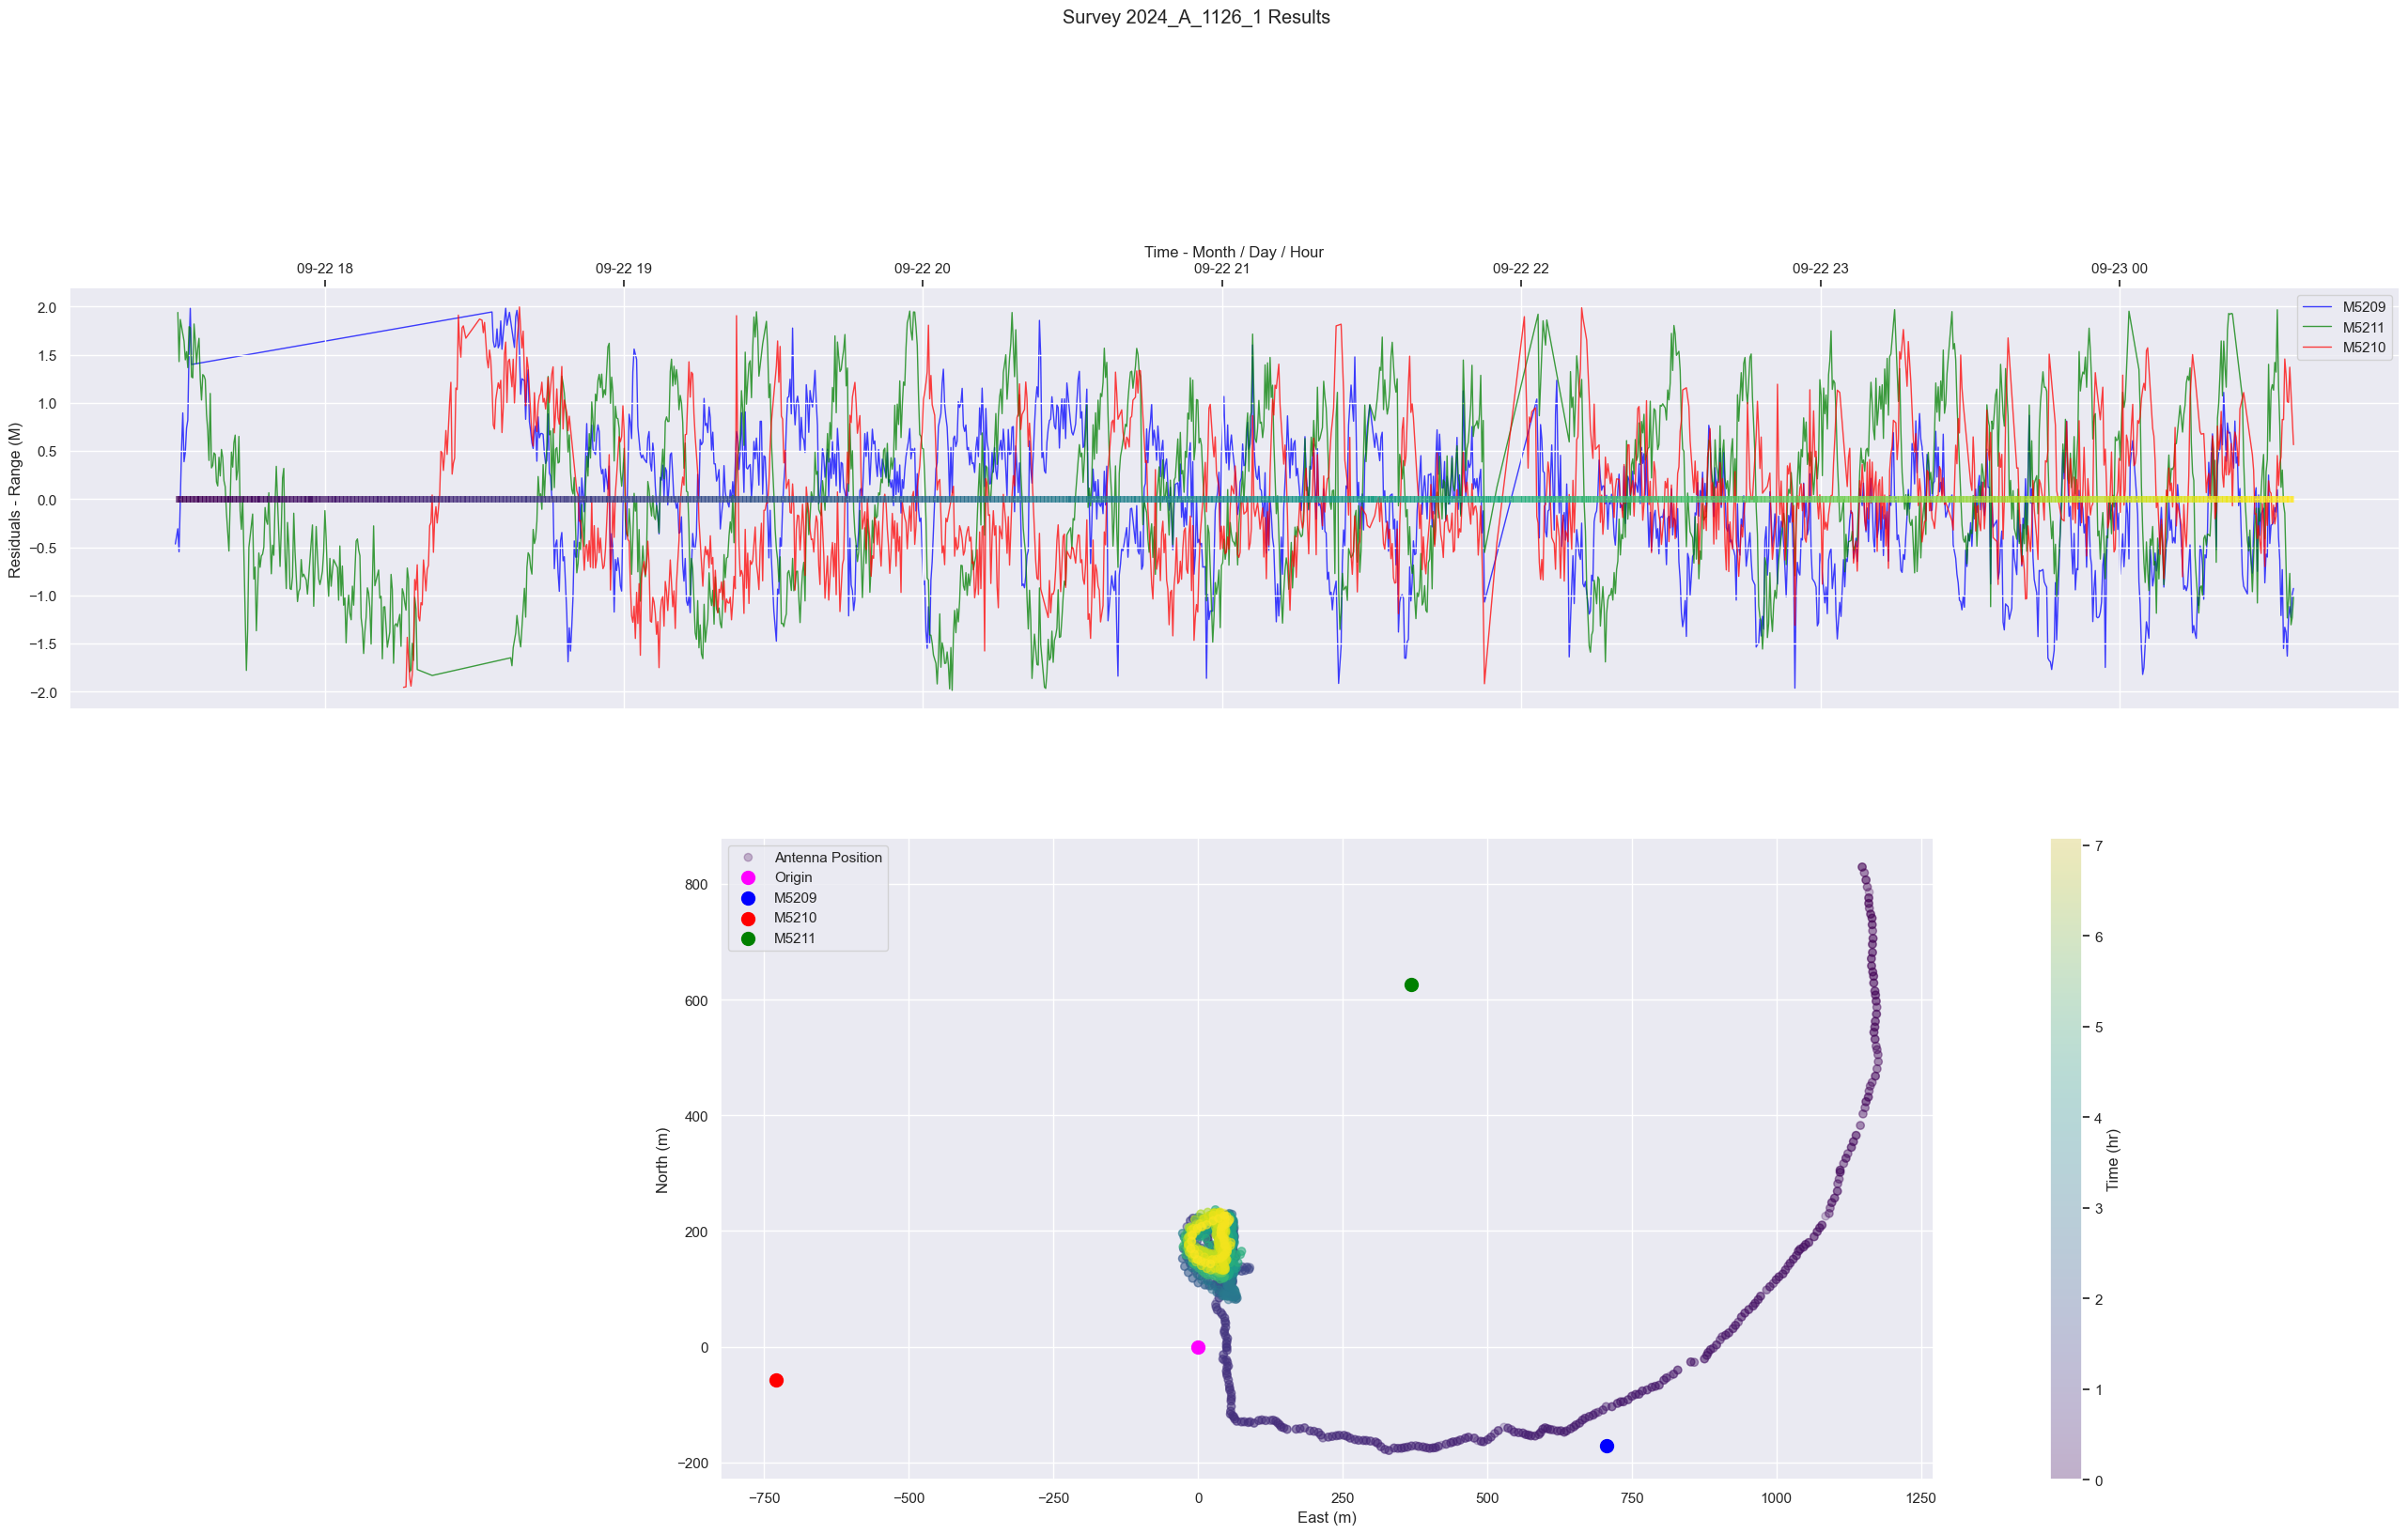

In [6]:
gp_handler_ncc1.plot_ts_results('2024_A_1126_1')

In [7]:
gp_handler_ncc1.run_garpos(survey_id="2024_A_1126_2", override=OVERRIDE)

Results already exist for /Users/franklyndunbar/Project/SeaFloorGeodesy/Data/SFGMain/cascadia-gorda/NCC1/GARPOS/results/2024_A_1126_2/_0_results.json


Plotting results for survey  2024_A_1126_2
Delta Center Position
Array :  East -0.314 m, North 2.485 m, Up 0.000 m 
TSP M5209 : East 0.001 m, North 0.297 m, Up 0.383 m 
TSP M5210 : East -0.011 m, North 0.309 m, Up 0.387 m 
TSP M5211 : East -0.006 m, North 0.296 m, Up 0.387 m 



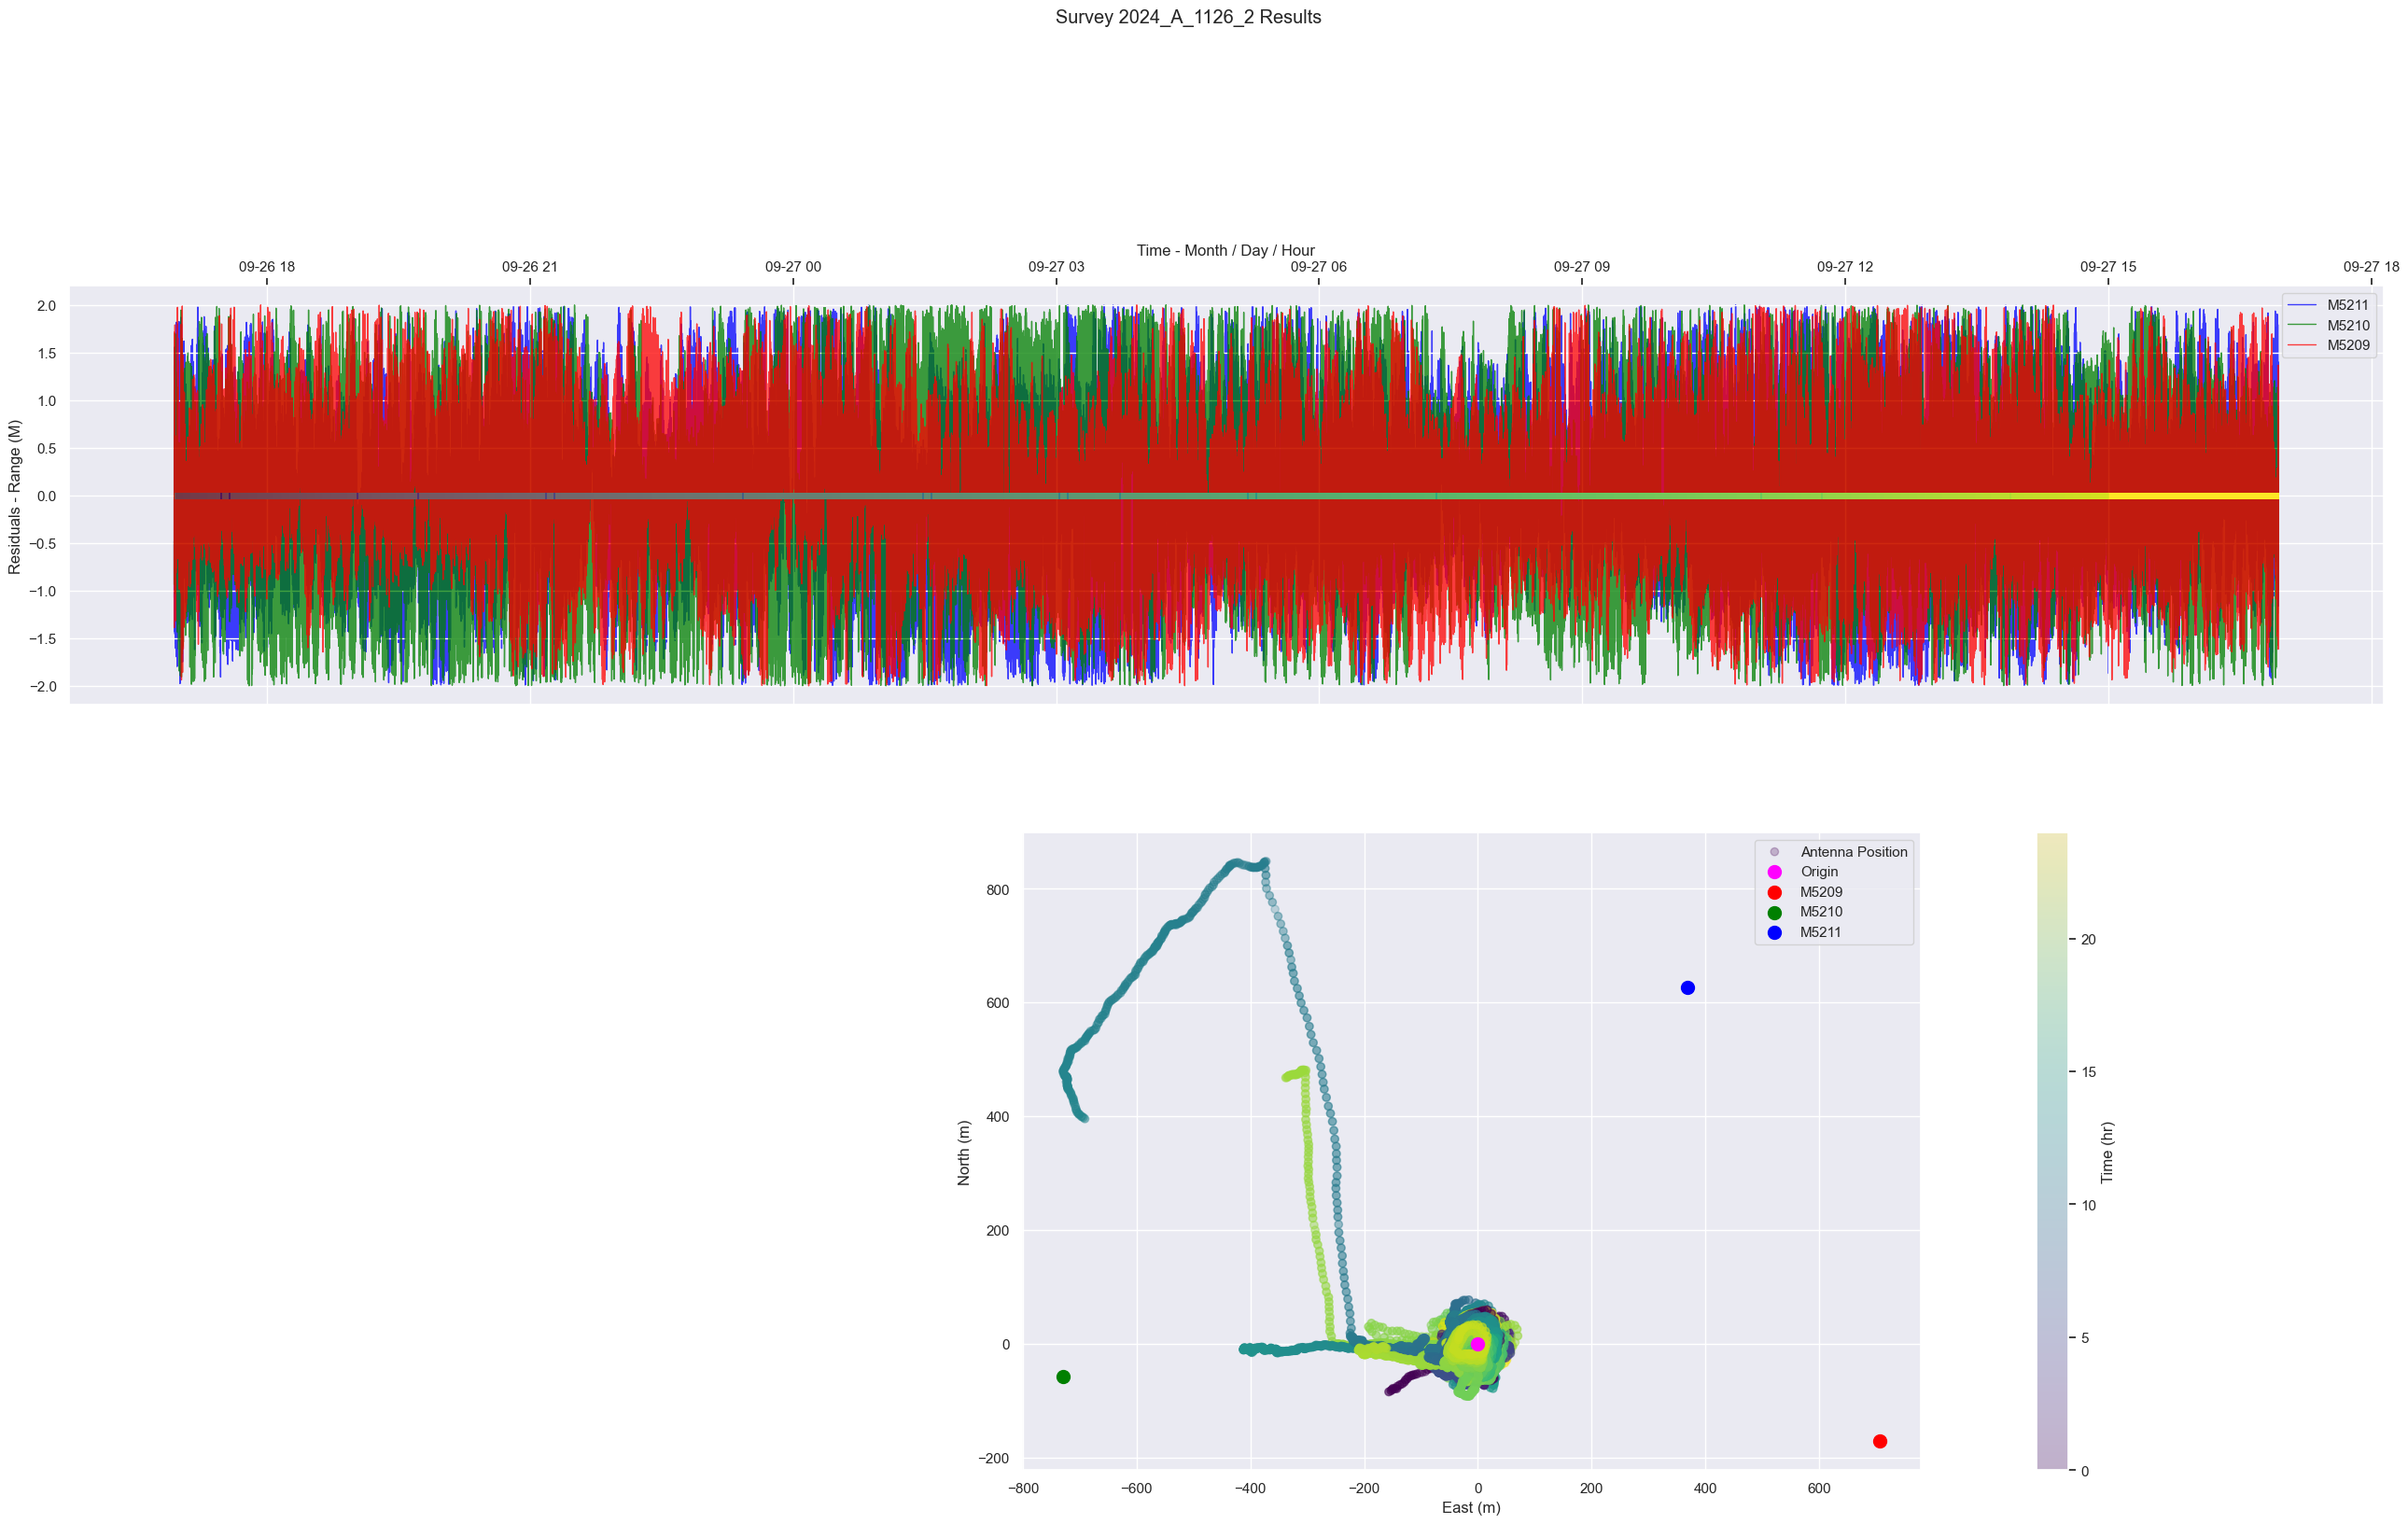

In [8]:
gp_handler_ncc1.plot_ts_results("2024_A_1126_2")

In [9]:
gp_handler_ncc1.run_garpos(survey_id="2024_A_1126_3",override=OVERRIDE)

Results already exist for /Users/franklyndunbar/Project/SeaFloorGeodesy/Data/SFGMain/cascadia-gorda/NCC1/GARPOS/results/2024_A_1126_3/_0_results.json


Plotting results for survey  2024_A_1126_3
Delta Center Position
Array :  East -0.844 m, North -2.016 m, Up 0.000 m 
TSP M5209 : East 0.081 m, North 0.081 m, Up 0.123 m 
TSP M5210 : East 0.061 m, North 0.070 m, Up 0.080 m 
TSP M5211 : East 0.053 m, North 0.064 m, Up 0.113 m 



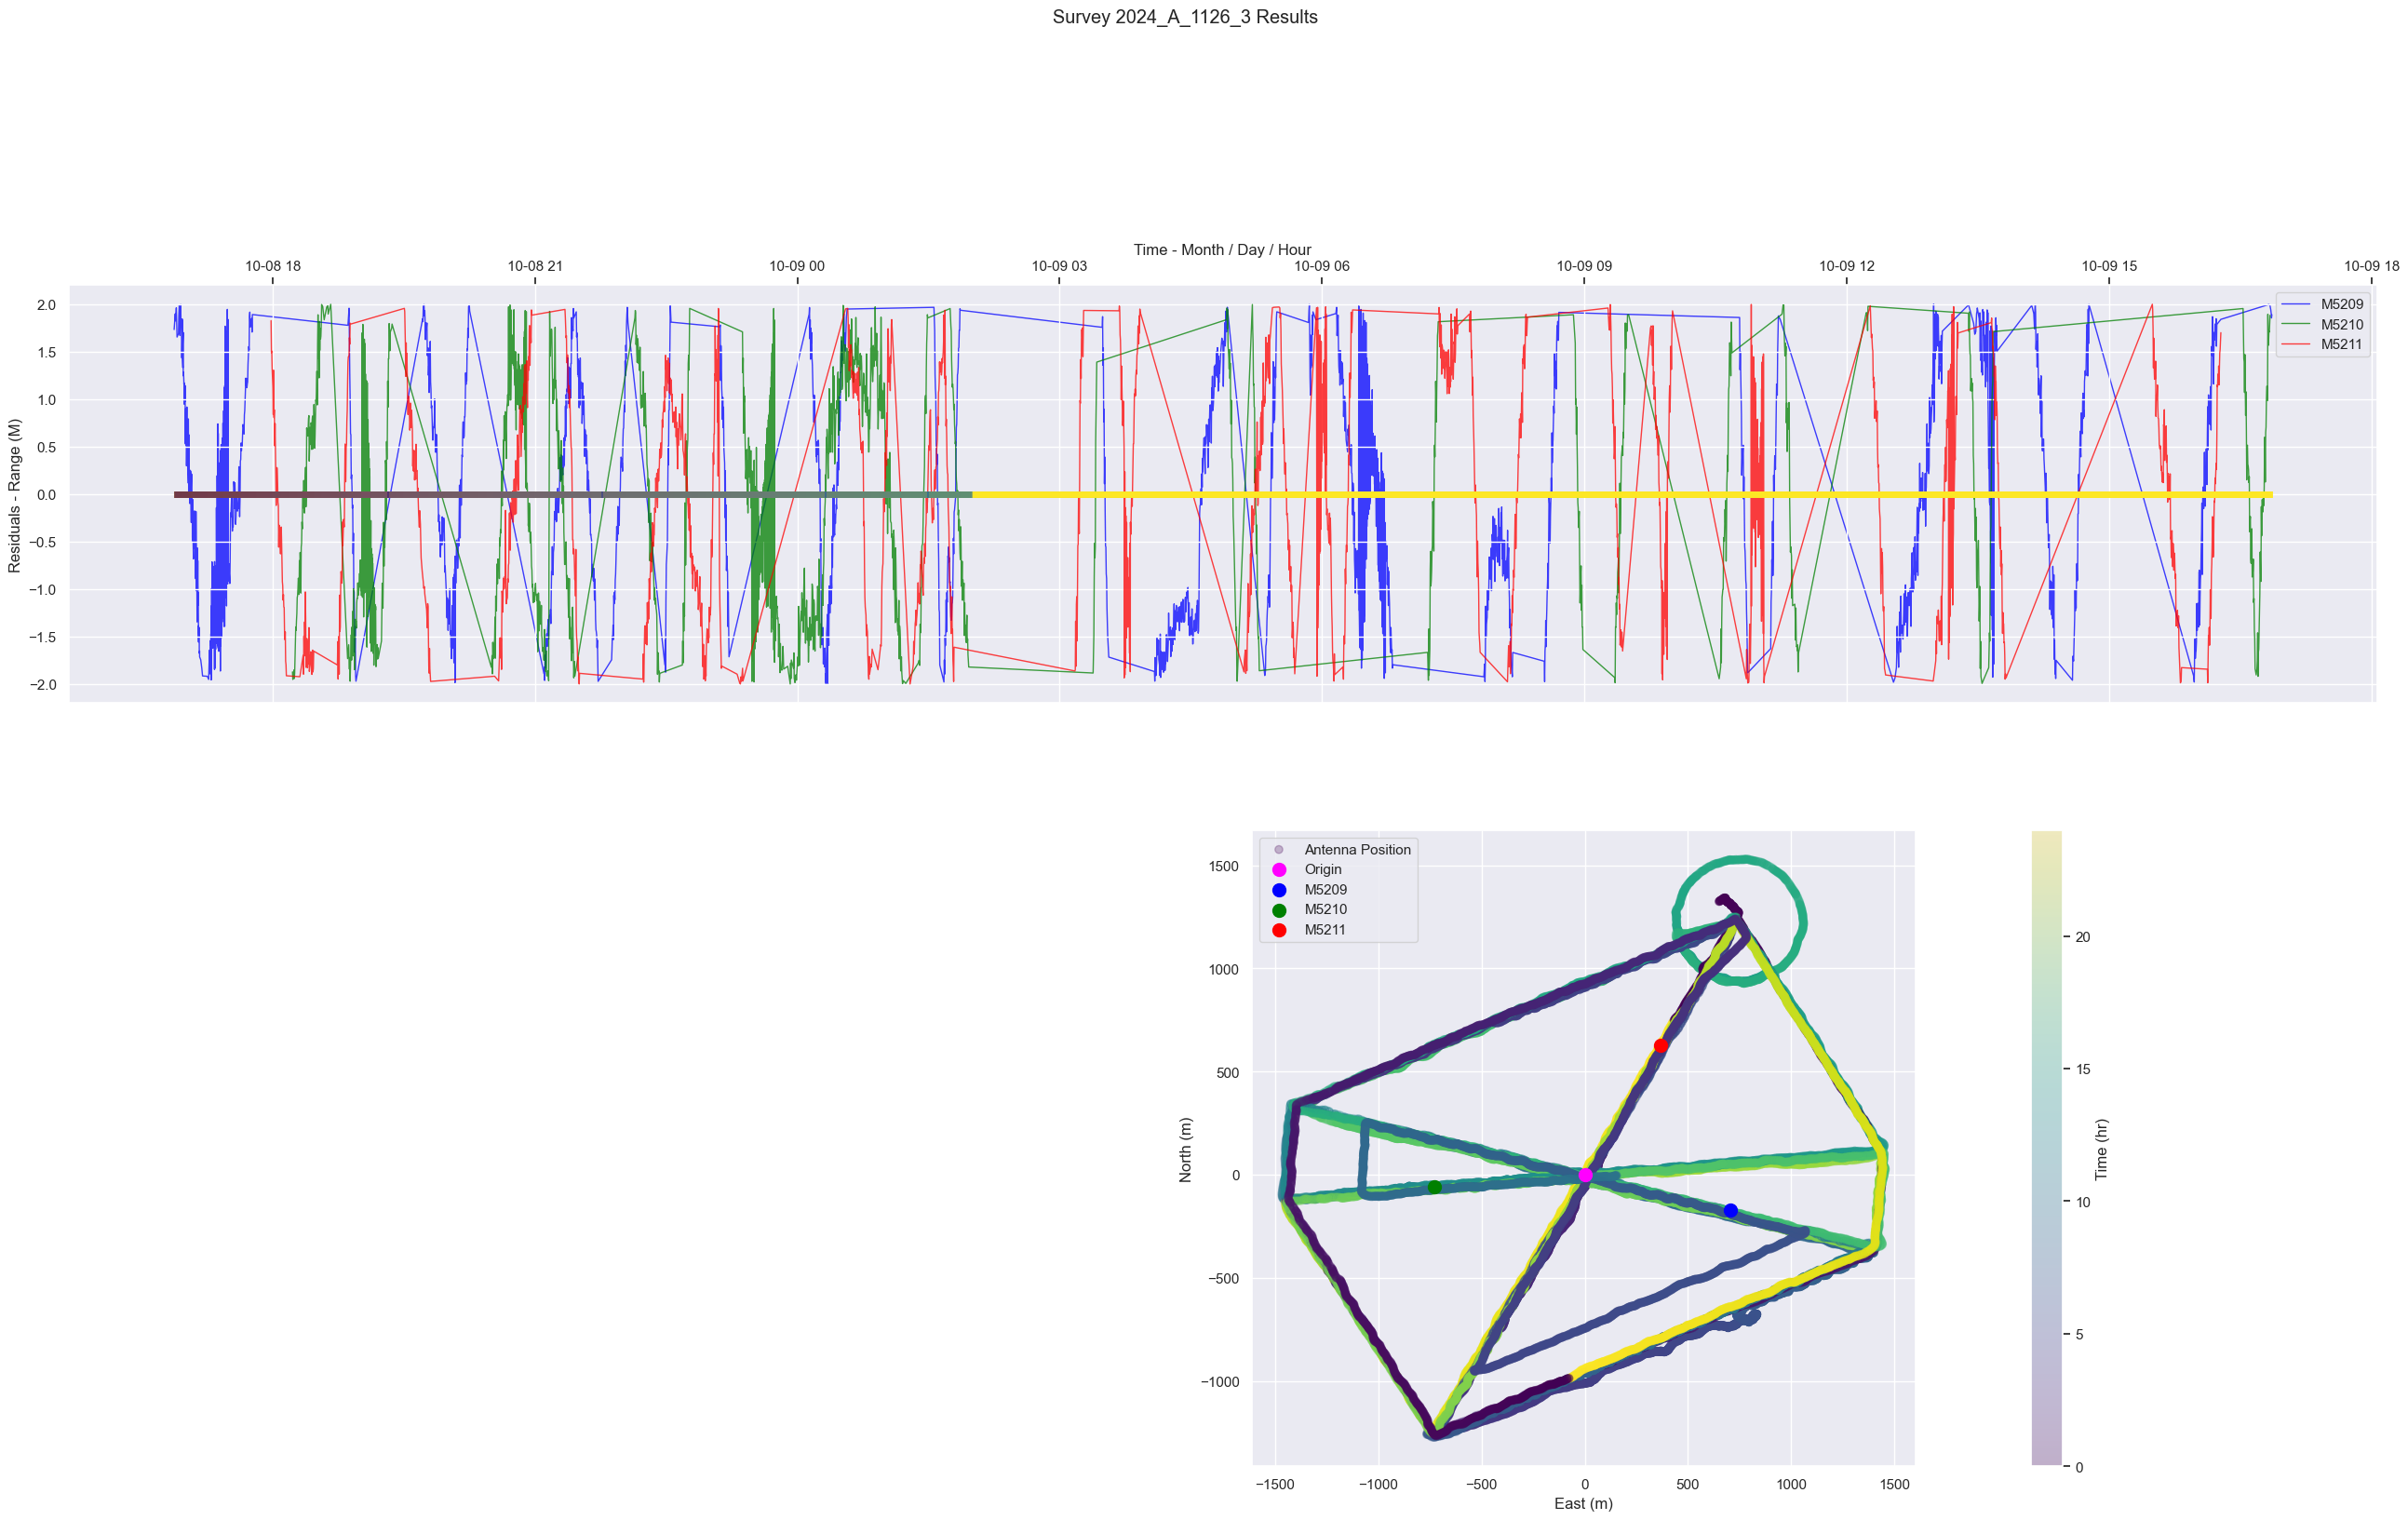

In [10]:
gp_handler_ncc1.plot_ts_results("2024_A_1126_3")

In [11]:
gp_handler_ncc1.run_garpos(survey_id="2024_A_1126_4",override=OVERRIDE)

Results already exist for /Users/franklyndunbar/Project/SeaFloorGeodesy/Data/SFGMain/cascadia-gorda/NCC1/GARPOS/results/2024_A_1126_4/_0_results.json


Plotting results for survey  2024_A_1126_4
Delta Center Position
Array :  East -0.561 m, North 2.136 m, Up 0.000 m 
TSP M5209 : East -0.251 m, North -0.044 m, Up -0.063 m 
TSP M5210 : East -0.236 m, North -0.078 m, Up -0.106 m 
TSP M5211 : East -0.247 m, North -0.040 m, Up -0.058 m 



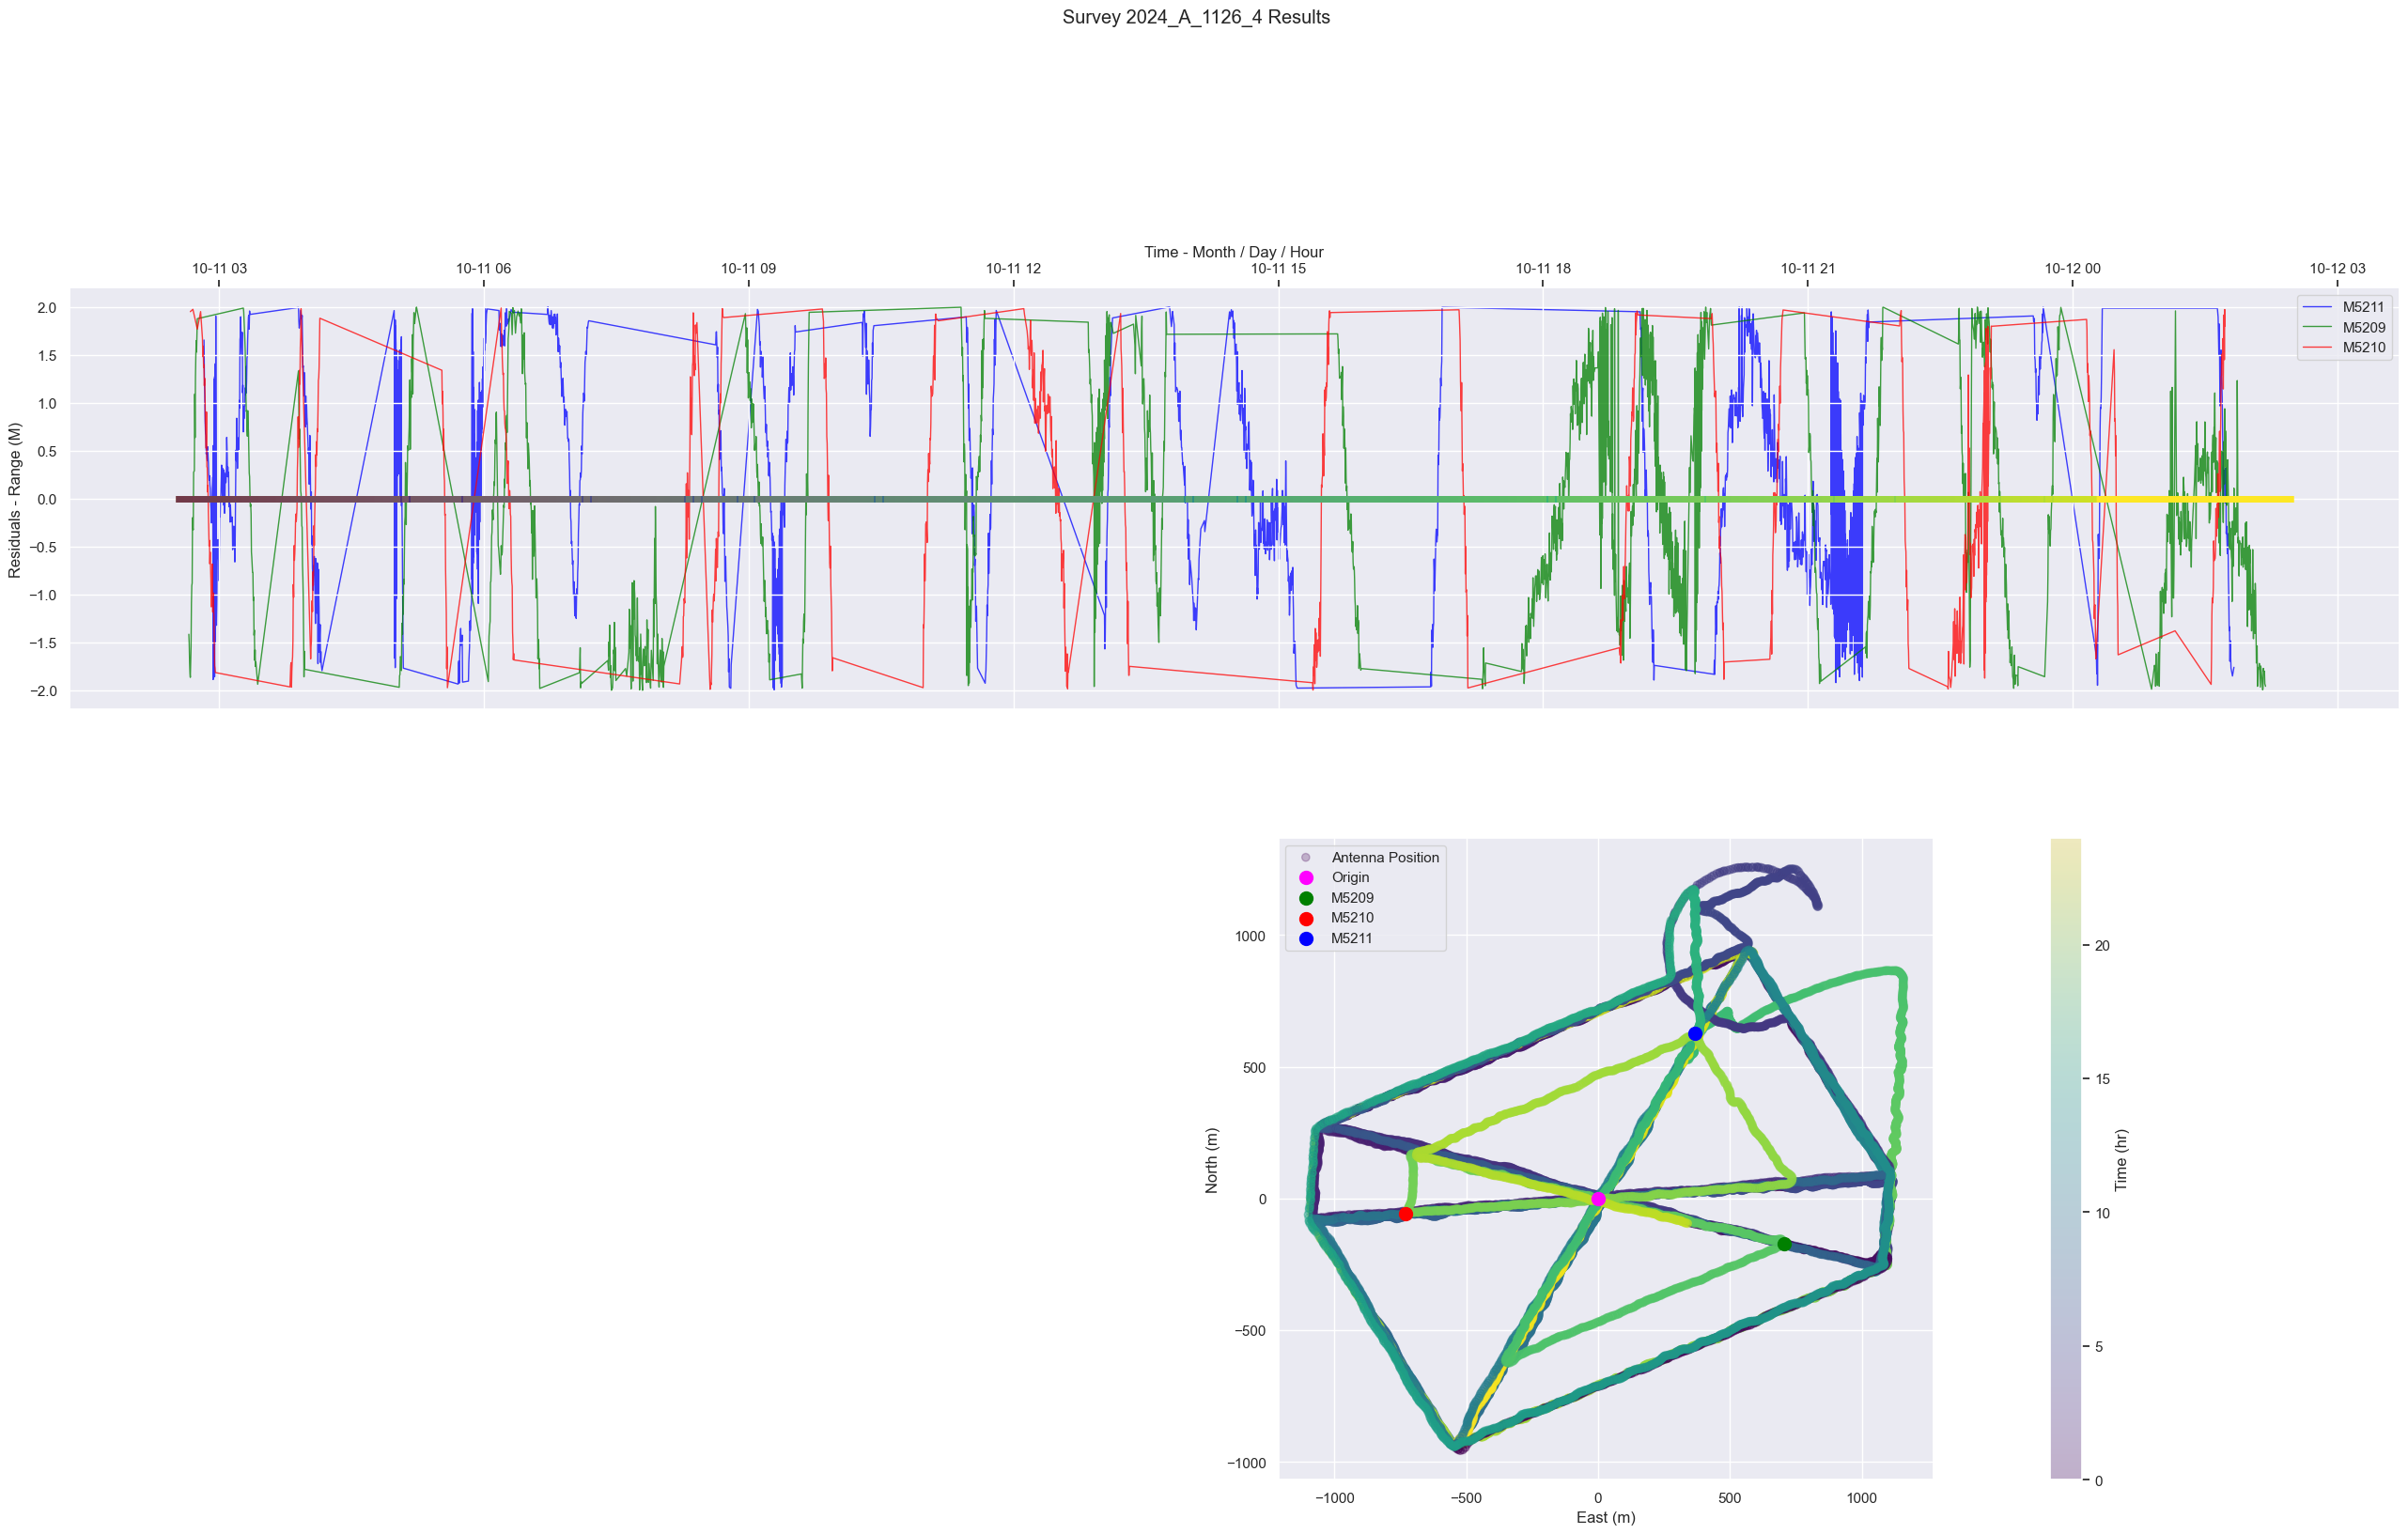

In [12]:
gp_handler_ncc1.plot_ts_results("2024_A_1126_4")

In [13]:
gp_handler_ncc1.run_garpos(survey_id="2024_A_1126_5",override=OVERRIDE)

Results already exist for /Users/franklyndunbar/Project/SeaFloorGeodesy/Data/SFGMain/cascadia-gorda/NCC1/GARPOS/results/2024_A_1126_5/_0_results.json


Plotting results for survey  2024_A_1126_5
Delta Center Position
Array :  East 4.398 m, North 2.594 m, Up 0.000 m 
TSP M5209 : East -0.192 m, North -0.093 m, Up -0.116 m 
TSP M5210 : East -0.137 m, North -0.077 m, Up -0.113 m 
TSP M5211 : East -0.170 m, North -0.055 m, Up -0.105 m 



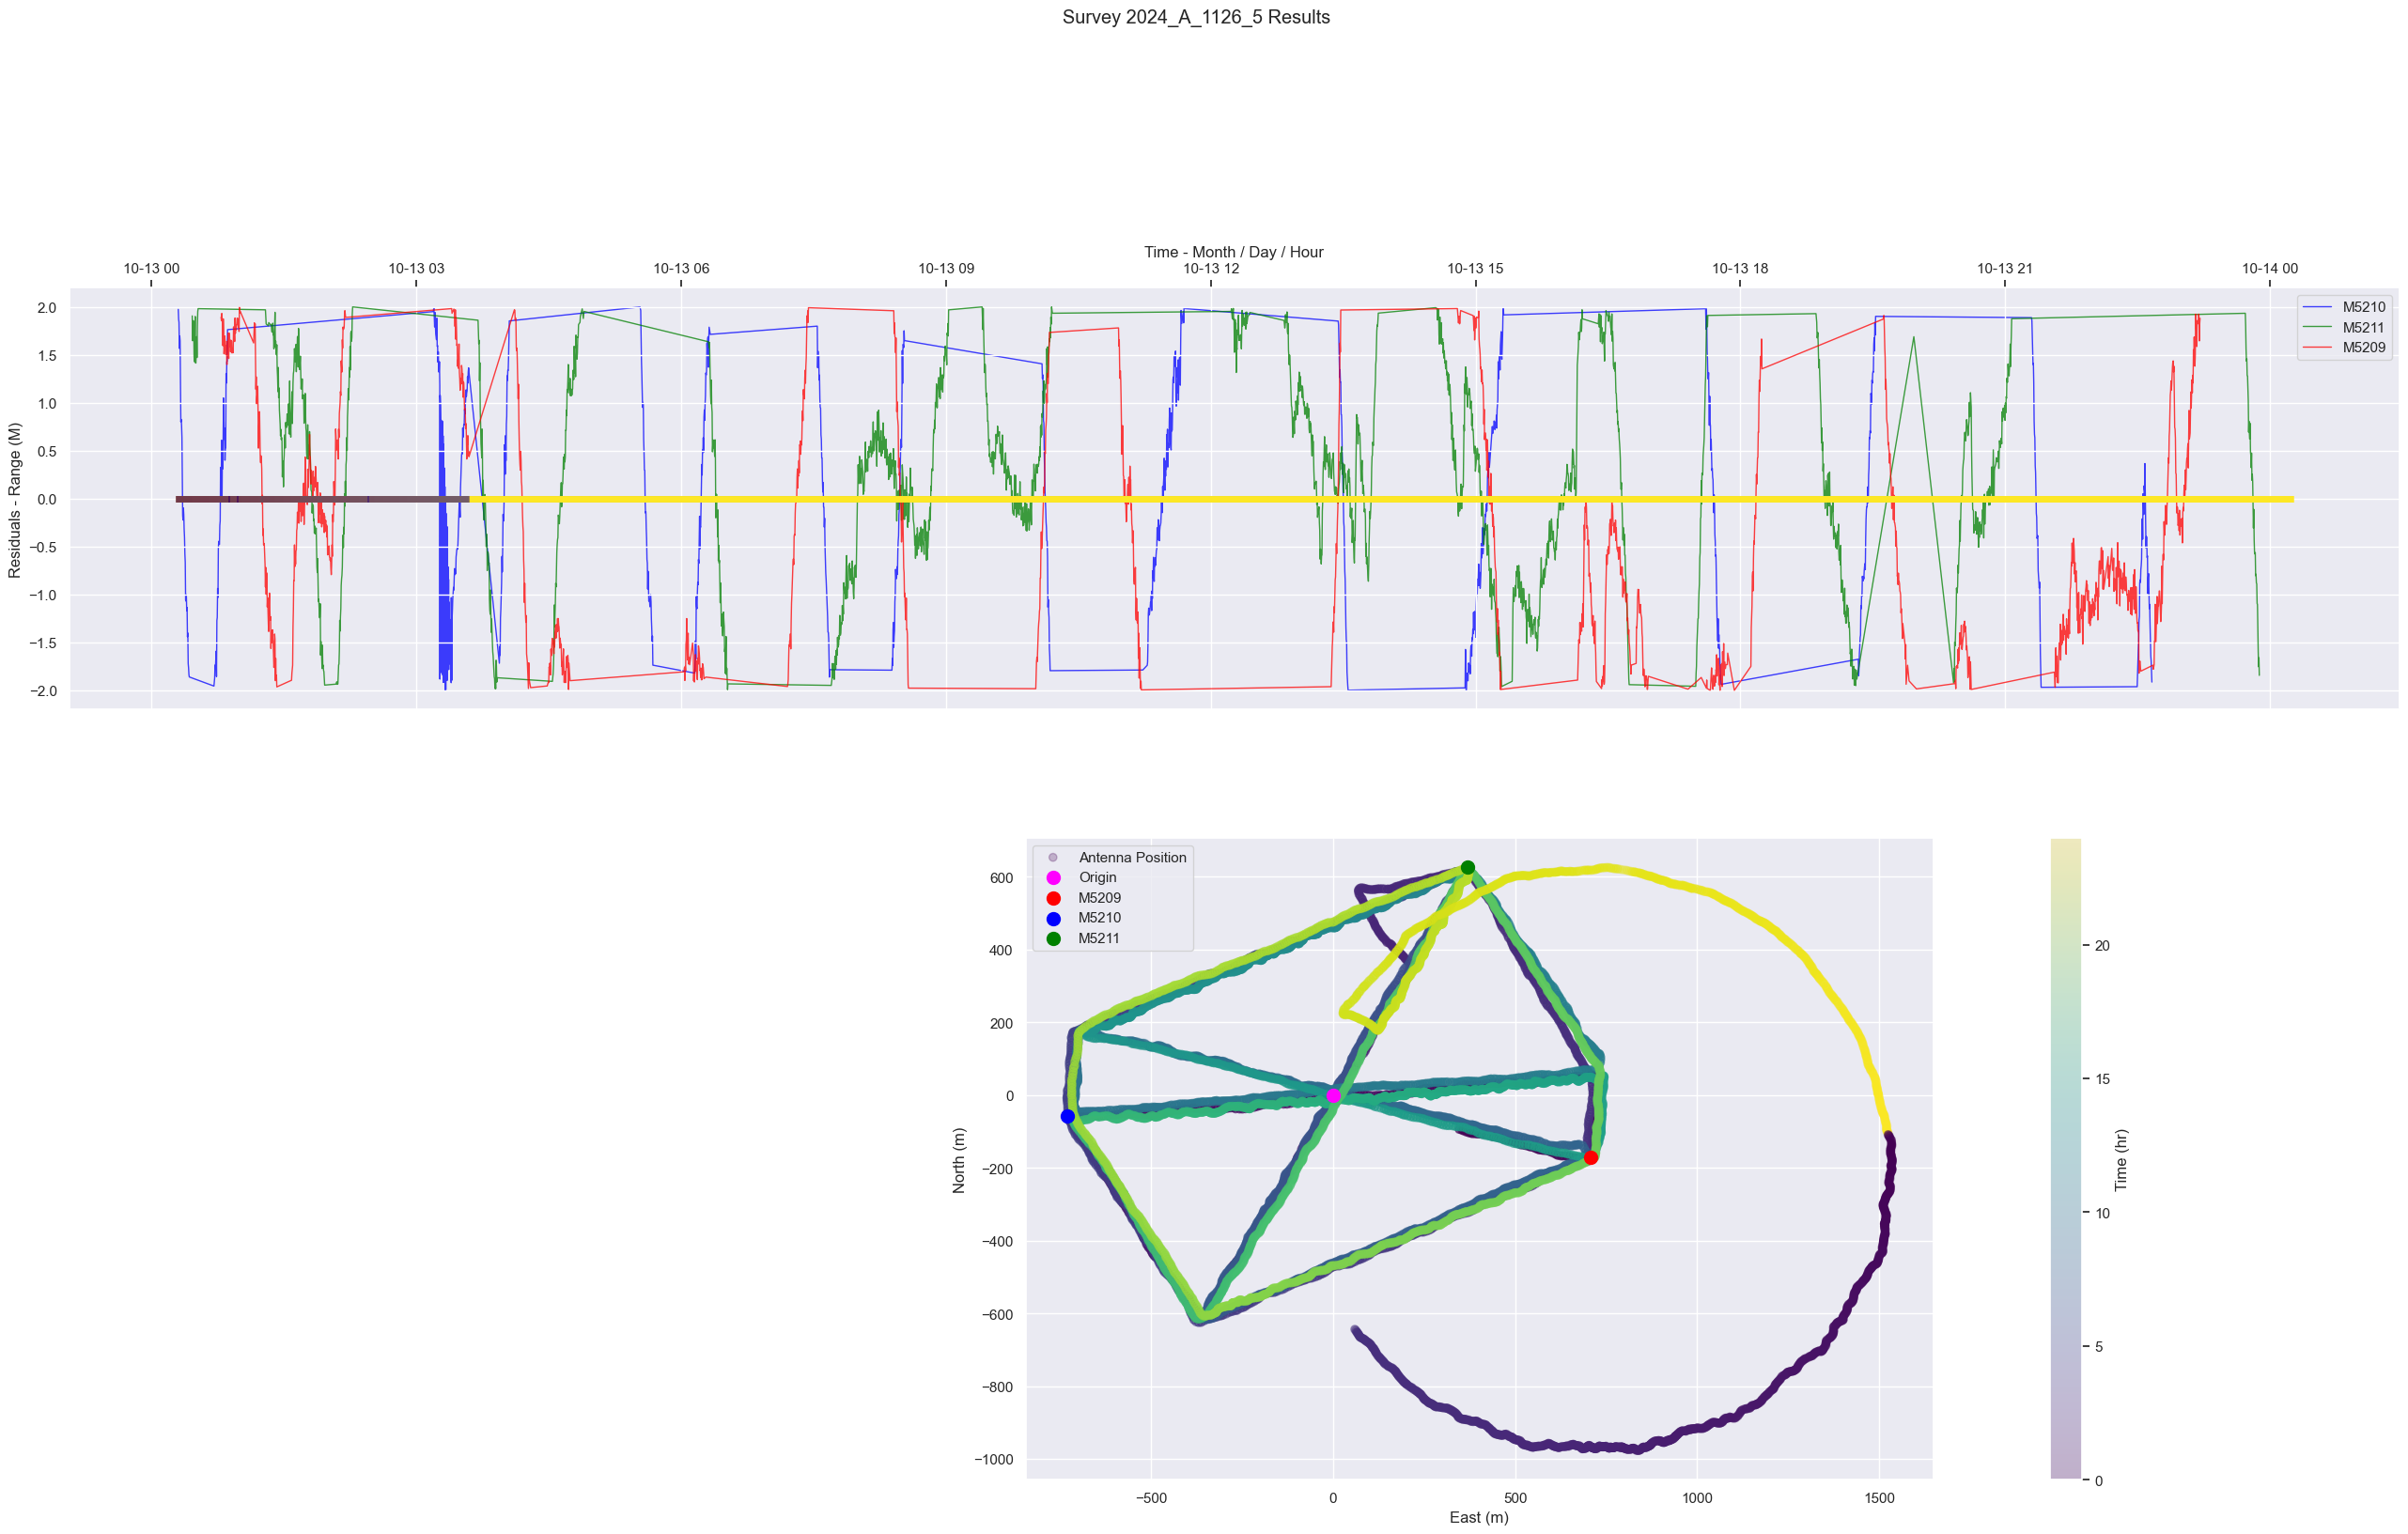

In [14]:
gp_handler_ncc1.plot_ts_results("2024_A_1126_5")